# Sales Prediction
### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Loading sales dataset

In [2]:
df = pd.read_csv('advertising.csv')
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


### Exploring and Understanding dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### Data Visualization

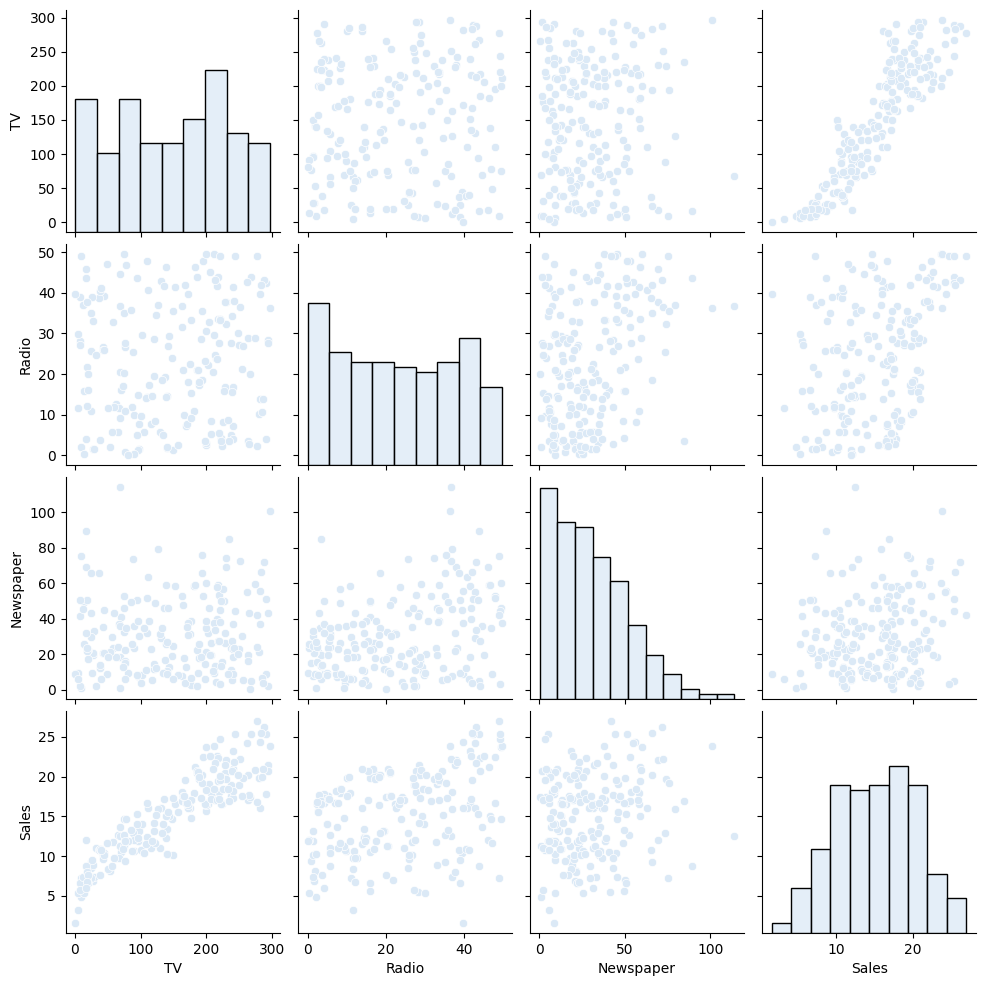

In [6]:
sns.set_palette("Blues")
sns.pairplot(df)
plt.show()

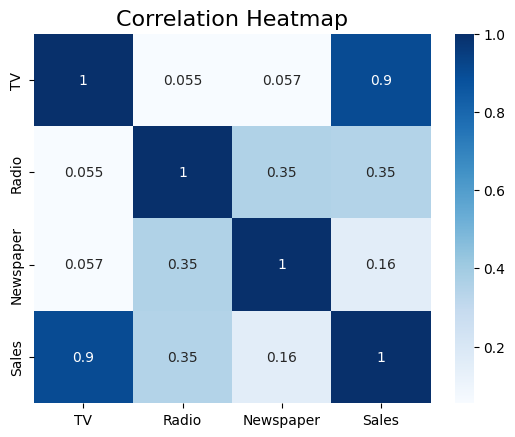

In [7]:
# Correlation Heatmap

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="Blues")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

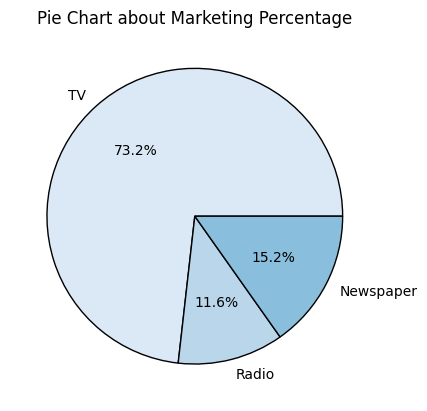

In [8]:
# Pie Chart

amounts = []
columns = ['TV', 'Radio', 'Newspaper']
for i in columns:
    amounts.append(df[i].sum())
sns.set_palette="Blues"
plt.title("Pie Chart about Marketing Percentage")
plt.pie(amounts, labels=columns, autopct="%1.1f%%", wedgeprops={'edgecolor': 'black'})
plt.show()


### Model Training

In [9]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# GradientBoostingRegressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Making predictions on the test set
rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)


In [12]:
# Evaluating models
def evaluate_model(predictions, y_true, model_name):
    mae = mean_absolute_error(y_true, predictions)
    mse = mean_squared_error(y_true, predictions)
    r2 = r2_score(y_true, predictions)

    print(f'{model_name} Metrics:')
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}\n')

evaluate_model(rf_predictions, y_test, 'Random Forest')
evaluate_model(gb_predictions, y_test, 'Gradient Boosting')

Random Forest Metrics:
Mean Absolute Error: 0.9179999999999993
Mean Squared Error: 1.4374328500000009
R-squared: 0.9534827934927883

Gradient Boosting Metrics:
Mean Absolute Error: 0.830119958670547
Mean Squared Error: 1.255260979893099
R-squared: 0.9593781134039533



### Visualization of Actual Vs Predicted Sales

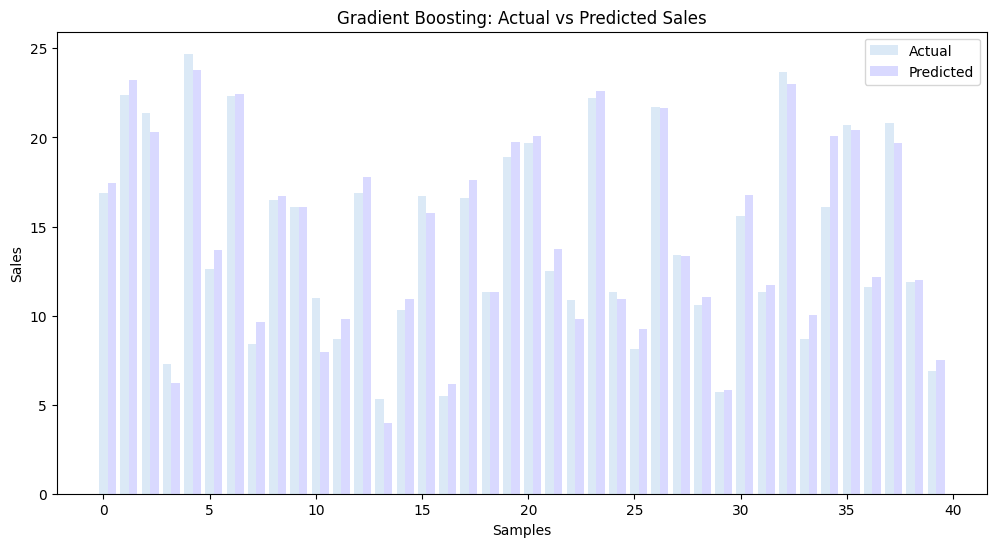

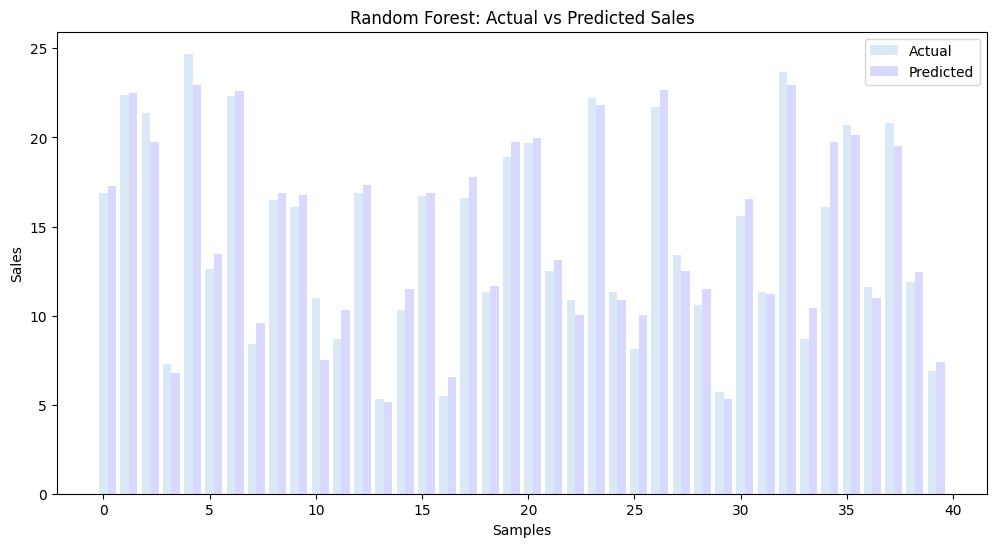

In [13]:
def plot_actual_vs_predicted(actual_values, predicted_values, model_name):
    plt.figure(figsize=(12, 6))
    plt.bar(np.arange(len(actual_values)), actual_values, width=0.4, label='Actual')
    plt.bar(np.arange(len(predicted_values)) + 0.4, predicted_values, width=0.4, label='Predicted',color="Blue",alpha=0.15)
    plt.title(f'{model_name}: Actual vs Predicted Sales')
    plt.xlabel('Samples')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()

# Bar Plot for Linear Regression
plot_actual_vs_predicted(y_test, gb_predictions , "Gradient Boosting")

# Bar Plot for Random Forest
plot_actual_vs_predicted(y_test, rf_predictions , "Random Forest")


### Prediction on new data

In [14]:
new_data = pd.DataFrame({'TV': [239, 150], 'Radio': [15, 25], 'Newspaper': [2, 40]})

# Making predictions on new data using trained models
rf_new_predictions = rf_model.predict(new_data)
gb_new_predictions = gb_model.predict(new_data)

print('Random Forest Predictions on New Data:', rf_new_predictions)
print('Gradient Boosting Predictions on New Data:', gb_new_predictions)


Random Forest Predictions on New Data: [19.482 14.764]
Gradient Boosting Predictions on New Data: [19.94846433 13.86409275]
